# Projet Équations Différentielles

#### Les équations de Lotka-Volterra, ou “modèle proie-prédateur”, sont couramment utilisées pour décrire la dynamique de systèmes biologiques dans lesquels un prédateur et sa proie interagissent dans un milieu commun. Elles ont été proposées indépendamment par A. J. Lotka en 1925 et V. Volterra en 1926 et s’écrivent de la manière suivante:

\begin{align*}
\dot{x}_1 &= x_1 (\alpha - \beta x_2) \\
\dot{x}_2 &= -x_2 (\gamma - \delta x_1) \\
\end{align*}

#### où x1 et x2 désignent le nombre (positif) de proies et de prédateurs respectivement et α, β, γ, δ sont des paramètres strictement positifs.

In [1]:
import autograd
import autograd.numpy as np

import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

In [2]:
def display_contour(f, x, y, levels):
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    fig, ax = plt.subplots()
    contour_set = plt.contour(
        X, Y, Z, colors="grey", linestyles="dashed", 
        levels=levels 
    )
    ax.clabel(contour_set)
    plt.grid(True)
    plt.xlabel("$x_1$") 
    plt.ylabel("$x_2$")
    plt.gca().set_aspect("equal")

#### 1. Donner une interprétation physique à chaque terme de la dynamique. Montrer qu’il existe deux points d’équilibre $(0, 0)$ et $\bar{x} \in \mathbb{R}_{+}^{*} \times \mathbb{R}_{+}^{*}$. Que peut-on dire de leur stabilité à ce stade ?

Soit $(x_1, x_2)$ un point d'équilibre.

Alors $(\dot{x}_1, \dot{x}_2) = (0, 0)$

$\Leftrightarrow
\begin{cases}
x_1 (\alpha - \beta x_2) = 0 \\
-x_2 (\gamma - \delta x_1) = 0 \\
\end{cases}$

$\Leftrightarrow
\begin{cases}
x_1 = 0 \\
x_2 = 0 \\
\end{cases}
\text{ou}$
$\begin{cases}
x_1 = \frac{\gamma}{\delta} \\
x_2 = \frac{\alpha}{\beta} \\
\end{cases}$

Et nous savons que les nombres α, β, γ, δ sont strictement positifs donc soit $(x_1, x_2) = (0, 0) \text{ soit } \bar{x} = (\frac{\gamma}{\delta}, \frac{\alpha}{\beta}) \in \mathbb{R}_{+}^{*} \times \mathbb{R}_{+}^{*}$.

Je crois qu'on ne sait rien sur la stabilité, on peut peut être utiliser le théorème de stabilité avec le caratère Hurwitzien de la jacobienne évaluée au point d'équilibre pour contredire

Je crois que la jacobienne est
$\begin{pmatrix}
\alpha - \beta x_2 &  -\beta x_1\\
\delta x_2 & -\gamma + \delta x_1\\
 \end{pmatrix}$

#### 2. A l’aide des fonctions meshgrid et quiver, visualiser graphiquement le champ de vecteurs. Intuiter le comportement des solutions. On pourra aussi utiliser streamplot pour visualiser le portrait de phase.

In [3]:
alpha = 1
beta = 1 #le graphe change si on change beta et delta --> interprétation physique Q1?
gamma = 1 #Quelles valeurs on prend? Comment on les justifie?
delta = 1

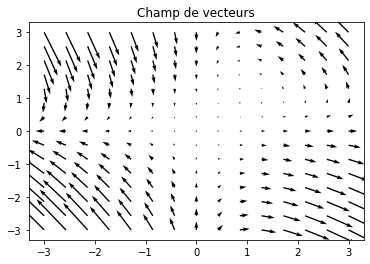

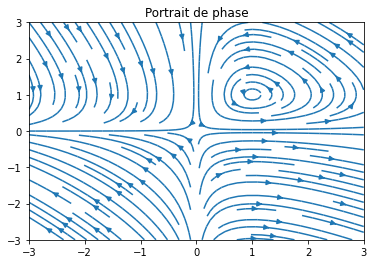

In [4]:
x1 = np.linspace(-3*gamma/delta, 3*gamma/delta, 15)
x2 = np.linspace(-3*alpha/beta, 3*alpha/beta, 15)
X, Y = np.meshgrid(x1, x2)
U, V = X*(alpha - beta*Y), -Y*(gamma - delta*X)

plt.title('Champ de vecteurs')
plt.quiver(X, Y, U, V);
plt.show();
plt.title('Portrait de phase')
plt.streamplot(X, Y, U, V);

Les solutions vont converger vers le point d'équilibre $\bar{x} = (\frac{\gamma}{\delta}, \frac{\alpha}{\beta})$ qui semble être un point d'équilibre globalement asymptotiquement stable. (Je ne suis pas sûr, à justifier)

#### 3. Par le théorème de Cauchy-Lipschitz, démontrer que toute solution initialisée dans $\mathbb{R}_{+}^{*} \times \mathbb{R}_{+}^{*}$ reste dans $\mathbb{R}_{+}^{*} \times \mathbb{R}_{+}^{*}$ sur son ensemble de définition.

#### 4. On considère la fonction $$H(x_1, x_2) = \delta x_1 − \gamma \ln{x_1} + \beta x_2 − \alpha \ln{x_2}$$ 

#### définie sur $\mathbb{R}_{+}^{*} \times \mathbb{R}_{+}^{*}$. Calculer la dérivée de $H$ le long des solutions initialisées dans $\mathbb{R}_{+}^{*} \times \mathbb{R}_{+}^{*}$. En déduire que toute solution maximale initialisée dans $\mathbb{R}_{+}^{*} \times \mathbb{R}_{+}^{*}$ est définie sur $\mathbb{R}$.

Le gradient de la fonction $H$ en un point $(x_1, x_2) \in \mathbb{R}_{+}^{*} \times \mathbb{R}_{+}^{*}$ vaut

$\nabla f(x_1, x_2) = \begin{pmatrix}
\delta - \gamma/x_1 \\
\beta - \alpha/x_2\\
\end{pmatrix}$

#### 5. Représenter les courbes de niveau de H. Où se trouve $\bar{x}$ ? Qu’en conclue-t-on sur le comportement des solutions ? En déduire (graphiquement) que $\bar{x}$ est stable, au sens de la définition de stabilité.

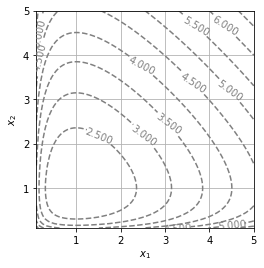

In [5]:
def H(x1, x2):
    x1 = np.array(x1)
    x2 = np.array(x2)
    return delta*x1 - gamma*np.log(x1) + beta*x2 -alpha*np.log(x2)

display_contour(
        H, 
        x=np.linspace(0.1, 5.0, 100), 
        y=np.linspace(0.1, 5.0, 100), 
        levels=10)

Il faut blablater en utilisant la 4.

#### 6. Coder une fonction du type

$\text{def  solve_euler_explicit }(f, x_0, dt, t_0, t_f): \\
...\\
\text{return  } t, x$

#### prenant en entrée une fonction $ f : \mathbb{R}\times\mathbb{R}^n \longrightarrow \mathbb{R}^n$ quelconque, une condition initiale $x_0$, un pas de temps $dt$, les temps initiaux et finaux, et renvoyant le vecteur des temps $t^j$ et de la solution $x^j$ du schéma d’Euler explicite appliqué à $\dot{x} = f(t, x)$. La tester sur une équation différentielle aux solutions exactes connues. Vérifier la convergence du schéma lorsque $dt$ tend vers 0. Comment visualiser graphiquement l’ordre de convergence ?

In [6]:
def solve_euler_explicit(f, x0, dt, t0, tf):
    t = []
    x = []
    while t0 < tf:
        funct = f(t0, x0)
        l = []
        for i in range(len(x0)):
            x0[i] += dt*funct[i]
            l.append(x0[i])
        t0 += dt
        x.append(l)
        t.append(t0)
    t, x = np.array(t), np.array(x)
    return t, x

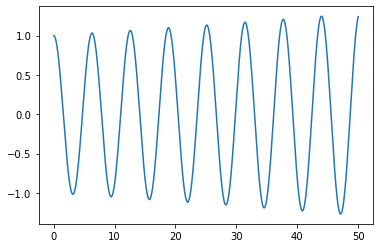

In [7]:
#équation différentielle du deuxième ordre du type
#f''(t) + f(t) = 0 avec f(0)=1 et f'(0)=0
#solution connue f(t) = cos(t)
def f(t, x):
    return [x[1], -x[0]]

A = solve_euler_explicit(f, [1, 0], 0.01, 0.0, 50)
plt.plot(A[0], A[1].transpose()[0]);

Essayer avec dt=0.1 ça part en couille, pour dt=0.001 ça marche si tf pas trop grand (pour tf=1000 ça partait jusqu'à 1.5 aux extremités, pas faire car long)

Donc si dt --> 0 ça converge bien

Ordre de convergence graphiquement?

#### 7. Utiliser le schéma d’Euler explicite pour simuler les équations de LotkaVolterra. Que constate-t-on en temps long ? Cette résolution vous semblet-elle fidèle à la réalité ? On pourra tracer l’évolution de la fonction $H$.

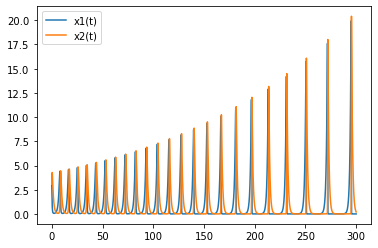

In [8]:
def g(t, x):
    x1, x2 = x[0], x[1]
    return [alpha*x1 - beta*x1*x2, -gamma*x2 + delta*x1*x2]

B = solve_euler_explicit(g, [3, 3], 0.01, 0.0, 300)
#print(B[0], B[1])
plt.plot(B[0], B[1].transpose()[0], label="x1(t)");
plt.plot(B[0], B[1].transpose()[1], label="x2(t)");
plt.legend();

Je ne compran pô trè bien se qui se pas

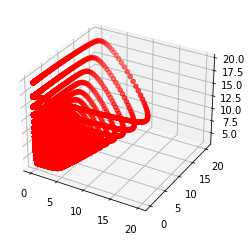

In [9]:
Z = H(B[1].transpose()[0], B[1].transpose()[1])

fig = plt.figure() 
ax = fig.add_subplot(projection='3d')
ax.scatter(B[1].transpose()[0],B[1].transpose()[1], Z, c='r');


Je compran encor moin, t'as fait du caca revois tes cochonneries

#### 8. Coder maintenant une fonction du type

$\text{def  solve_euler_implicit }(f, x_0, dt, t_0, t_f, intermax = 100): \\
...\\
\text{return  } t, x$


#### donnant la solution d’un schéma d’Euler implicite appliqué à $\dot{x} = f(t, x)$ selon la méthode présentée dans le cours. Vérifier de nouveau sa convergence sur des solutions connues. Que se passe-t-il cette fois-ci sur les équations de Lotka-Volterra ?


In [10]:
def solve_euler_implicit(f, x0, dt, t0, tf, eps=0.1):
    t = []
    x = []
    xj = x0.copy()
    while t0 < tf:
        #nous définissons la fonction F dont le point fixe est la valeur recherchée
        def F(temps, xj, a):
            L = []
            funct = f(temps, a)
            for i in range(len(x0)):
                L.append(xj[i] + dt*funct[i])
            return L
        #nous affinons pour obtenir la valeur du point fixe avec la certitude souhaitée
        #la fonction F est appliquée avec temps = tj+dt
        t0 += dt
        a, b = F(t0, xj, xj), xj
        while np.linalg.norm(np.array(b) - np.array(a)) > eps:
            b = a
            a = F(t0, xj, b)
        xj = a
        x.append(xj)
        t.append(t0)
    return np.array(t), np.array(x)     

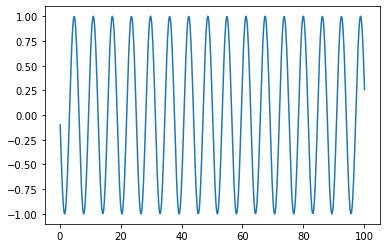

In [11]:
C = solve_euler_implicit(f, [1, 0], 0.1, 0.0, 100, 0.1)
plt.plot(C[0], C[1].transpose()[1]);

En changeant la valeur de epsilon on voit que ça diverge aussi pour epsilon grand, mais la méthode est meilleure que l'explicite (pour que ça converge un epsilon relativement grand suffit)

PS: je parle d'epsilon mais l'énoncé parle d'intermax, revoir